# AS4PA Forth set of exercises:

Gaudio Raffaele (2057974)

Delivery: 08/05/2022

In [297]:
#importing cell

library("ggplot2")
library("dplyr")
library("gridExtra")
library("lubridate")
library("tidyverse")

### Exercise 1 - Community Mobility Open Data

Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/.

Download and analyze the following data sets:

https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv

and

https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared to baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.
To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:

- **retail and recreation**, i.e. places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters

- **grocery and pharmacy**, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies

- **parks**, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens

- **transit stations** i.e. all public transport hubs such as subway, bus, and train stations

- **workplaces**, i.e. places of work

- **residential**, i.e. people’s residence

a) Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

b) produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID- 19 restrictions on mobility sitations.




In [298]:
#create the dataframes for italy and france

ita20<-read.csv("2020_IT_Region_Mobility_Report.csv")
ita21<-read.csv("2021_IT_Region_Mobility_Report.csv")
ita22<-read.csv("2022_IT_Region_Mobility_Report.csv")

df_ita<-rbind(ita20,ita21,ita22)


fr20<-read.csv("2020_FR_Region_Mobility_Report.csv")
fr21<-read.csv("2021_FR_Region_Mobility_Report.csv")
fr22<-read.csv("2022_FR_Region_Mobility_Report.csv")

df_fr<-rbind(fr20,fr21,fr22)

In [299]:
df_ita<-df_ita %>% mutate(
                    week = ifelse(year(df_ita$date)==2020, 
                    week(df_ita$'date'), 
                        ifelse(year(df_ita$'date')==2021,
                            week(df_ita$'date')+53,
                            week(df_ita$'date')+106)
                        )
                    )

df_ita<-df_ita %>% mutate(
                    month = ifelse(year(df_ita$date)==2020, 
                    month(df_ita$'date'), 
                        ifelse(year(df_ita$'date')==2021,
                            month(df_ita$'date')+53,
                            month(df_ita$'date')+106)
                        )
                    )

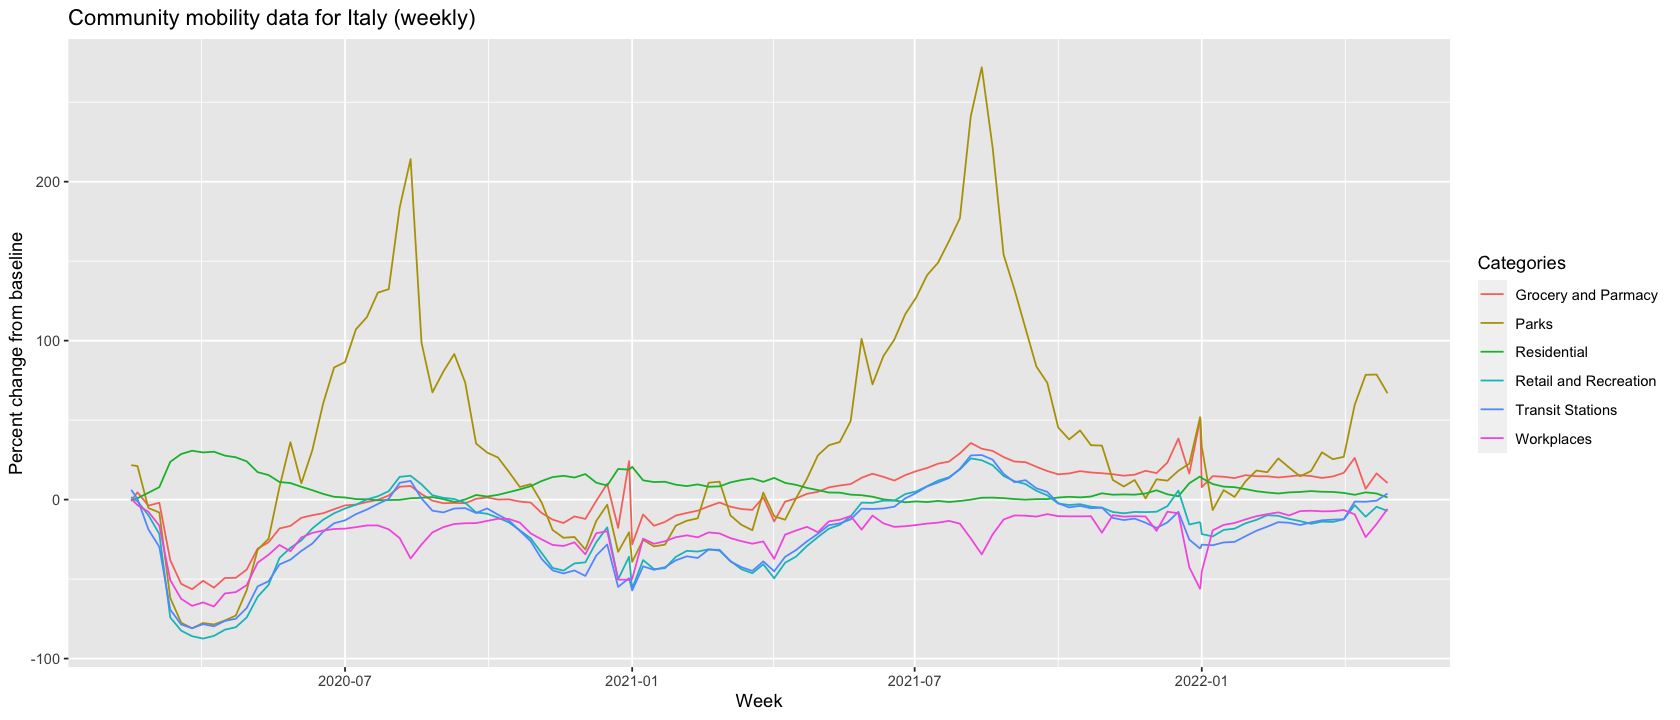

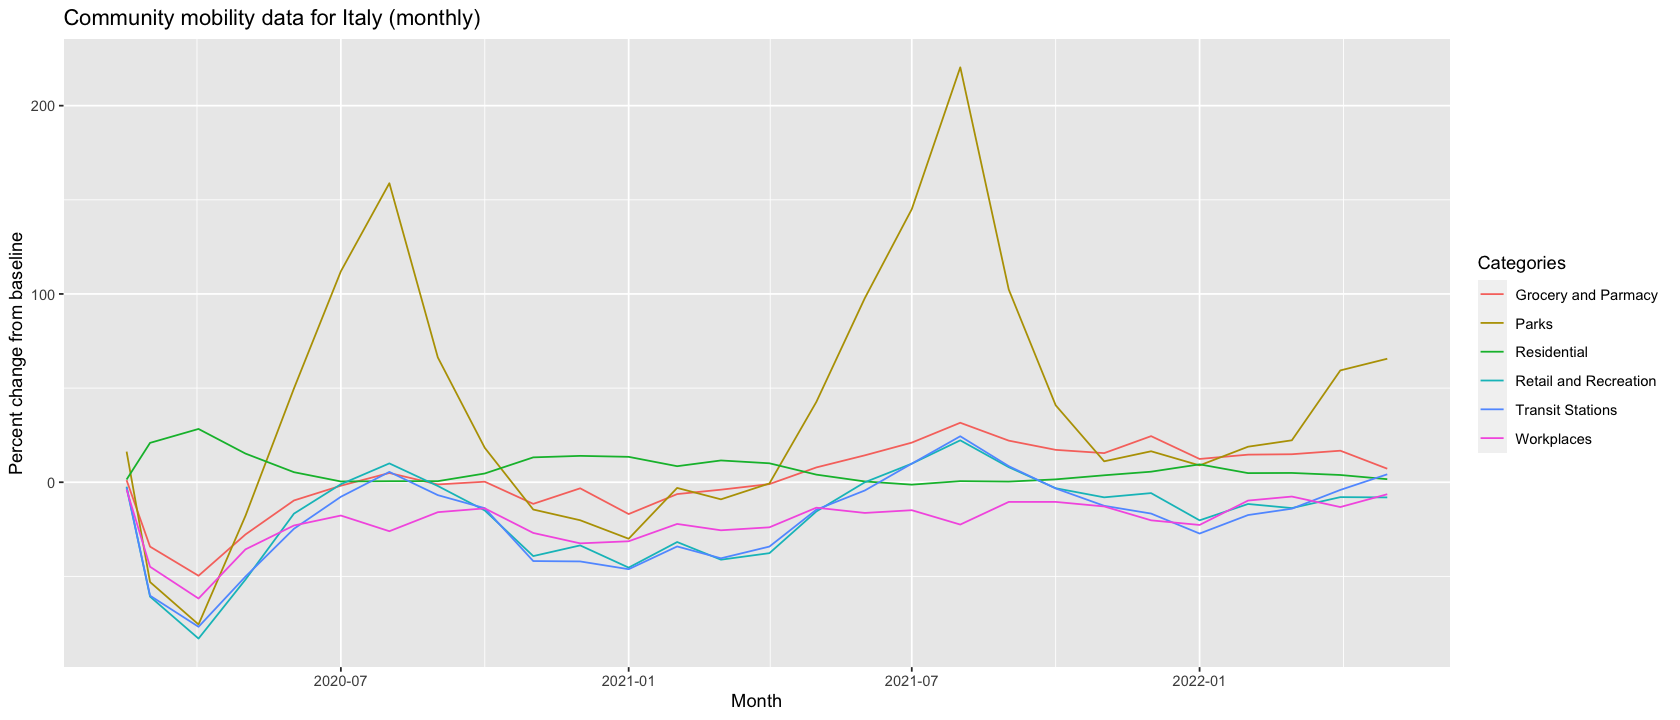

In [300]:
ita_week <- df_ita %>% group_by(week)
ita_week <- bind_cols(ita_week %>% summarize_at(c(10:15),funs(mean(.,na.rm = TRUE))),
                      ita_week %>% summarise(date=ymd(first(date))) %>% select(date))
ita_week <- ita_week %>% tidyr::gather("Categories", "Percent_change_from_baseline", 2:7)

ita_month <- df_ita %>% group_by(month)
ita_month <- bind_cols(ita_month %>% summarize_at(c(10:15),funs(mean(.,na.rm = TRUE))),
                       ita_month %>% summarise(date=ymd(first(date))) %>% select(date))
ita_month <- ita_month %>% tidyr::gather("Categories", "Percent_change_from_baseline", 2:7)

#Plots
ggplot(ita_week, aes(date, Percent_change_from_baseline, colour=Categories, group = Categories))+
       geom_line()+
       labs(x="Week", y="Percent change from baseline", title="Community mobility data for Italy (weekly)")+
       scale_colour_discrete(labels=c("Grocery and Parmacy", "Parks","Residential","Retail and Recreation","Transit Stations","Workplaces")) 

ggplot(ita_month, aes(date, Percent_change_from_baseline, colour=Categories, group = Categories))+
       geom_line()+
       labs(x="Month", y="Percent change from baseline", title="Community mobility data for Italy (monthly)")+
       scale_colour_discrete(labels=c("Grocery and Parmacy", "Parks","Residential","Retail and Recreation","Transit Stations","Workplaces")) 



In [301]:
df_fr<-df_fr %>% mutate(
                    week = ifelse(year(df_fr$date)==2020, 
                    week(df_fr$'date'), 
                        ifelse(year(df_fr$'date')==2021,
                            week(df_fr$'date')+53,
                            week(df_fr$'date')+106)
                        )
                    )

df_fr<-df_fr %>% mutate(
                    month = ifelse(year(df_fr$date)==2020, 
                    month(df_fr$'date'), 
                        ifelse(year(df_fr$'date')==2021,
                            month(df_fr$'date')+53,
                            month(df_fr$'date')+106)
                        )
                    )

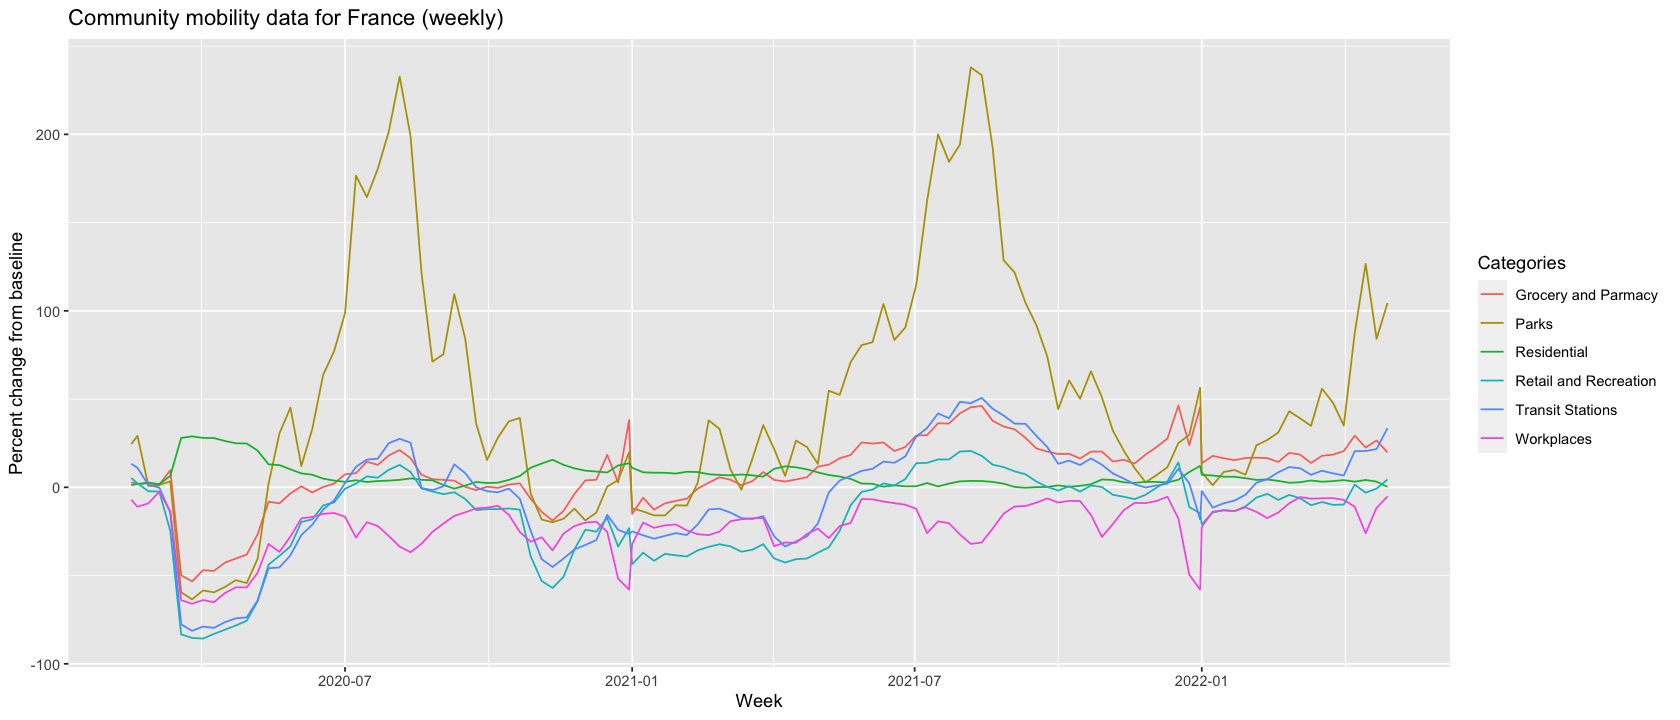

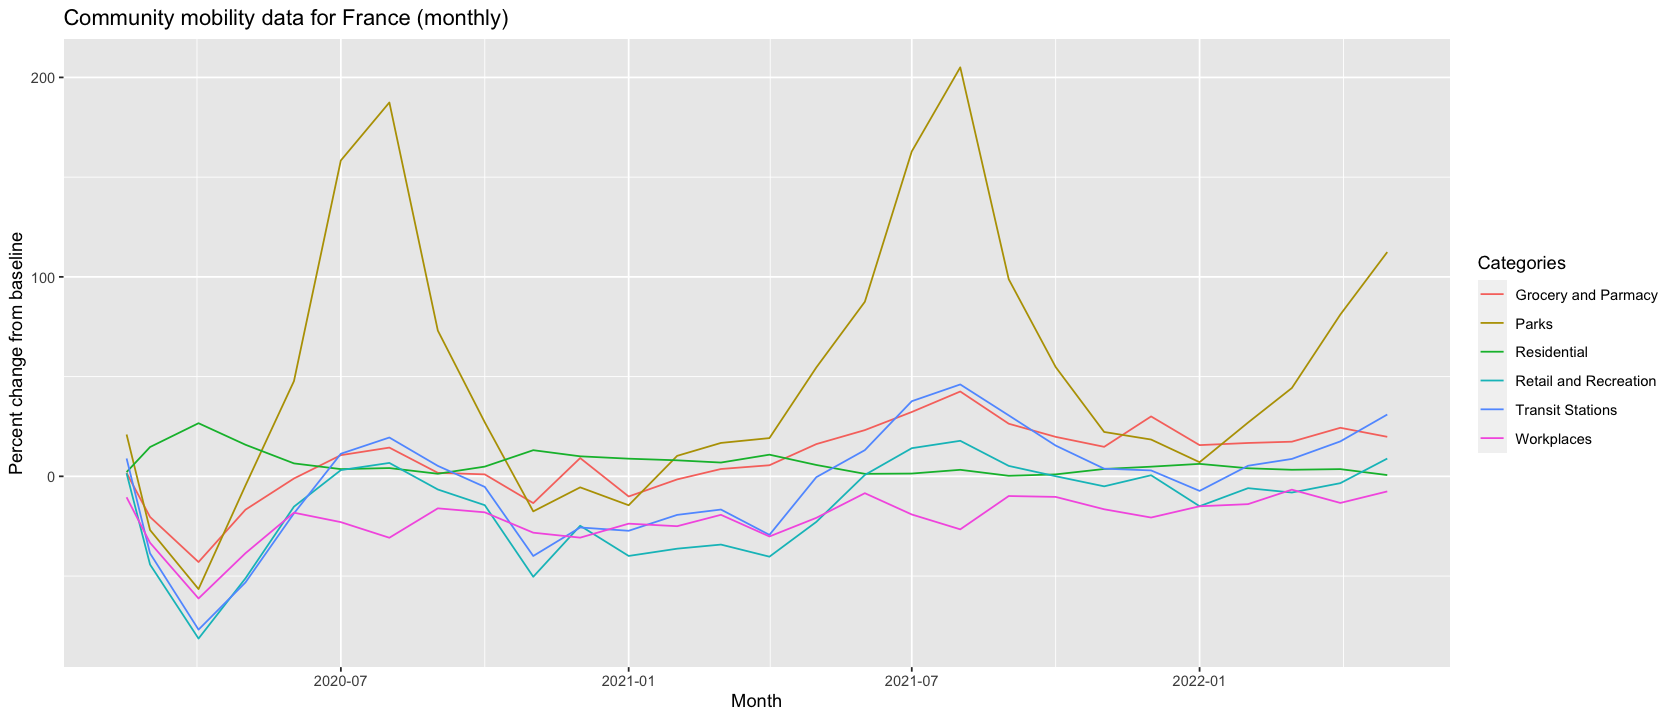

In [302]:
fr_week <- df_fr %>% group_by(week)
fr_week <- bind_cols(fr_week %>% summarize_at(c(10:15),funs(mean(.,na.rm = TRUE))),
                      fr_week %>% summarise(date=ymd(first(date))) %>% select(date))
fr_week <- fr_week %>% tidyr::gather("Categories", "Percent_change_from_baseline", 2:7)

fr_month <- df_fr %>% group_by(month)
fr_month <- bind_cols(fr_month %>% summarize_at(c(10:15),funs(mean(.,na.rm = TRUE))),
                       fr_month %>% summarise(date=ymd(first(date))) %>% select(date))
fr_month <- fr_month %>% tidyr::gather("Categories", "Percent_change_from_baseline", 2:7)

#Plots
ggplot(fr_week, aes(date, Percent_change_from_baseline, colour=Categories, group = Categories))+
       geom_line()+
       labs(x="Week", y="Percent change from baseline", title="Community mobility data for France (weekly)")+
       scale_colour_discrete(labels=c("Grocery and Parmacy", "Parks","Residential","Retail and Recreation","Transit Stations","Workplaces")) 

ggplot(fr_month, aes(date, Percent_change_from_baseline, colour=Categories, group = Categories))+
       geom_line()+
       labs(x="Month", y="Percent change from baseline", title="Community mobility data for France (monthly)")+
       scale_colour_discrete(labels=c("Grocery and Parmacy", "Parks","Residential","Retail and Recreation","Transit Stations","Workplaces")) 



### Exercise 2 - Random number generators

One of the first random number generator was proposed by von Neumann, the so-called middle square algorithm.

a) write R code to implement this type of generator and, given a fixed digit number input, square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

$Suggestion$ : after having squared the number, convert it to a list of characters (**number <- unlist(strsplit(as.character(x.squared),""))**)
and, after having removed the head and tail of the list, convert it back to a number (**as.numeric(paste(number.after.trimming, collapse=""))**)



In [303]:
#a) write R code to implement this type of generator and, given a fixed digit number input, 
#   square it an remove the leading and trailing digits, in order to return a number with the same number of digits as the original number.

pseudo_random_number_generator<-function(seed=10,len=1){
    
    rand_seq <- NULL
    
    for(i in 1:len){   
        n <- length(unlist(strsplit(as.character(seed),"")))
        seed.sq <- seed*seed    
        number <- unlist(strsplit(as.character(seed.sq),""))       
    
        if(n%%2==0){
        head.length <- n/2
        tail.length <- n/2
        }

        else{
            head.length <- floor(n/2)
            tail.length <- floor(n/2)+1
        }
 
        number <- c(rep(0, 2*n-length(number)), number) 
        
        seed <- number[(head.length+1):(2*n-tail.length)]
        seed <- as.numeric(paste(seed, collapse=""))
        rand_seq <- c(rand_seq,seed)             
    }   

    return(rand_seq)
}

In [304]:
pseudo_random_number_generator(seed=123,len=14)
pseudo_random_number_generator(seed=123,len=28)  

#as we can see, after 14 numbers, the algorithm produces the same sequence

[1] 151 228 519 693 802 432 866 499 490 401 608 696 844 123

[1] 151 228 519 693 802 432 866 499 490 401 608 696 844 123 151 228 519 693 802
[20] 432 866 499 490 401 608 696 844 123

### Exercise 3 - Bayesian Inference

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the last issue of the journal.

a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

b) Assuming a uniform prior, what is the posterior distribution for y?

c) Plot both posterior and likelihood ditributions functions.

In [305]:
#a) What kind of distribution would you assume for y, the number of people that have seen the last issue of the journal?

#the problem is dicotomic -> binomial distribution

#b) Assuming a uniform prior, what is the posterior distribution for y?

n <- 150 
y <- 29

x <- seq(0,150,1)

p.like <- dbinom(x=x, size=n, prob=29/150)

#Posterior
n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

#Posterior normalized
p.star <- dbinom(x=y, size=n, prob=p)
p.post.norm <- p.star/(delta.p*sum(p.star))
p.mean <- delta.p*sum(p*p.post.norm)

Posterior average: 0.1973684

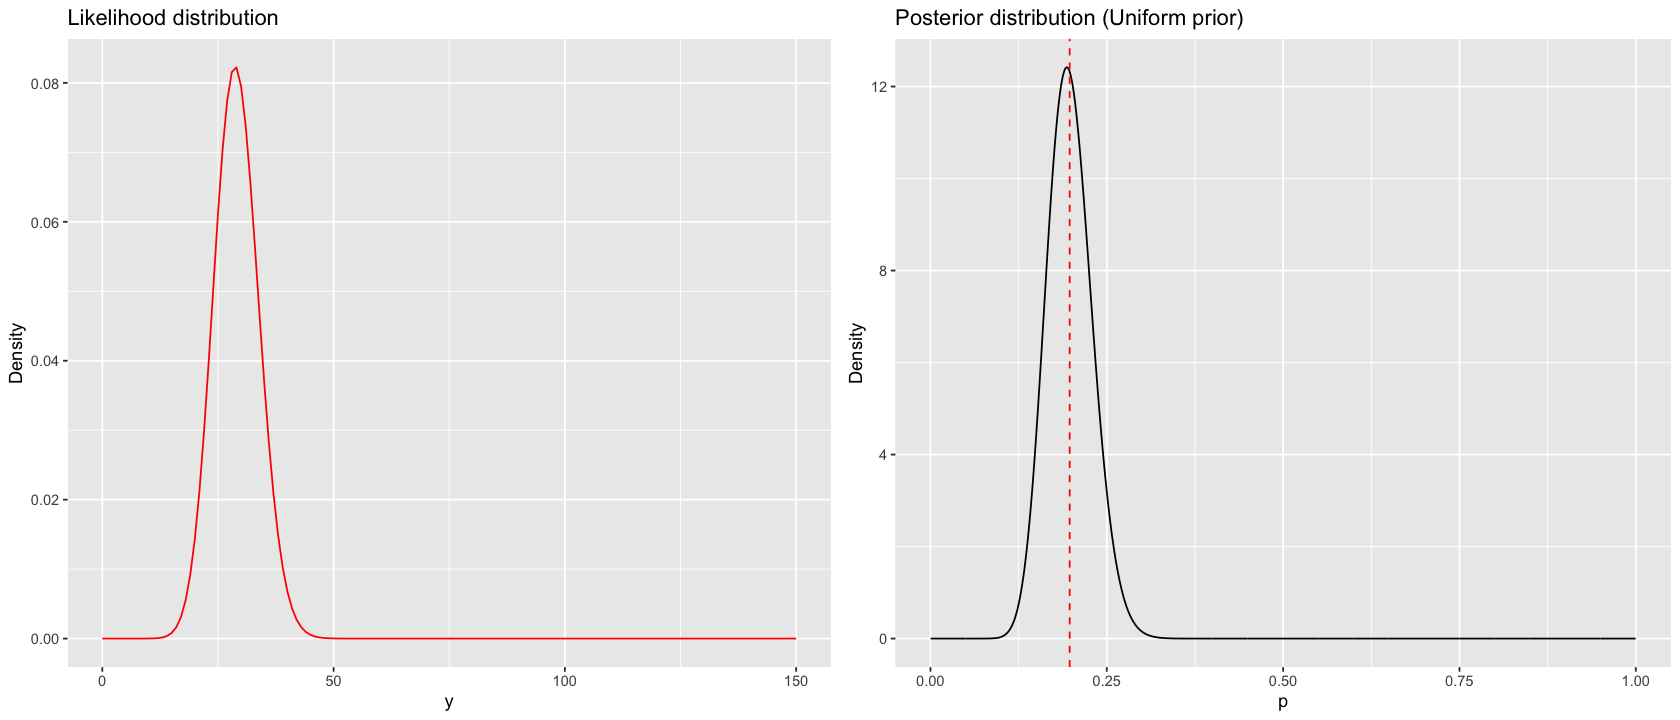

In [306]:
#c) Plot both posterior and likelihood ditributions functions.


fig1<-ggplot()+
        geom_line(aes(x,p.like),color="red")+
        labs(title="Likelihood distribution",x="y",y="Density")

fig2<-ggplot()+
        geom_line(aes(p,p.post.norm))+
        geom_vline(xintercept = p.mean,color="red",linetype="dashed")+
        labs(title="Posterior distribution (Uniform prior)",x="p",y="Density")


options(repr.plot.width=14, repr.plot.height=6)
grid.arrange(fig1,fig2,nrow=1,ncol=2)
cat("Posterior average:",p.mean)

### Exercise 4 - Bayesian Inference

A coin is flipped n = 30 times with the following outcomes:

T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H

a) Assuming a flatprior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

b) Evaluate the most probable value for the coin probability p and, integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

c) Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

In [307]:
#a) Assuming a flatprior, and a beta prior, plot the likelihood, prior and posterior distributions for the data set.

n<-30
head<-15

x<-seq(1,30,1)

#Likelihood
p.like <- dbinom(x=x, size=n, prob=1/2)

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

#Uniform prior
p.star.uniform <- dbinom(x=head, size=n, prob=p)
p.post.norm.uniform <- p.star.uniform/(delta.p*sum(p.star.uniform))
p.mean.uniform <- delta.p*sum(p*p.post.norm.uniform)

#Beta prior
alpha<-10
beta<-10

beta.prior<-dbeta(x=p,alpha,beta)
p.post.beta<-dbeta(x=p,alpha+head,beta+(n-head))
p.mean.beta <- delta.p*sum(p*p.post.beta)


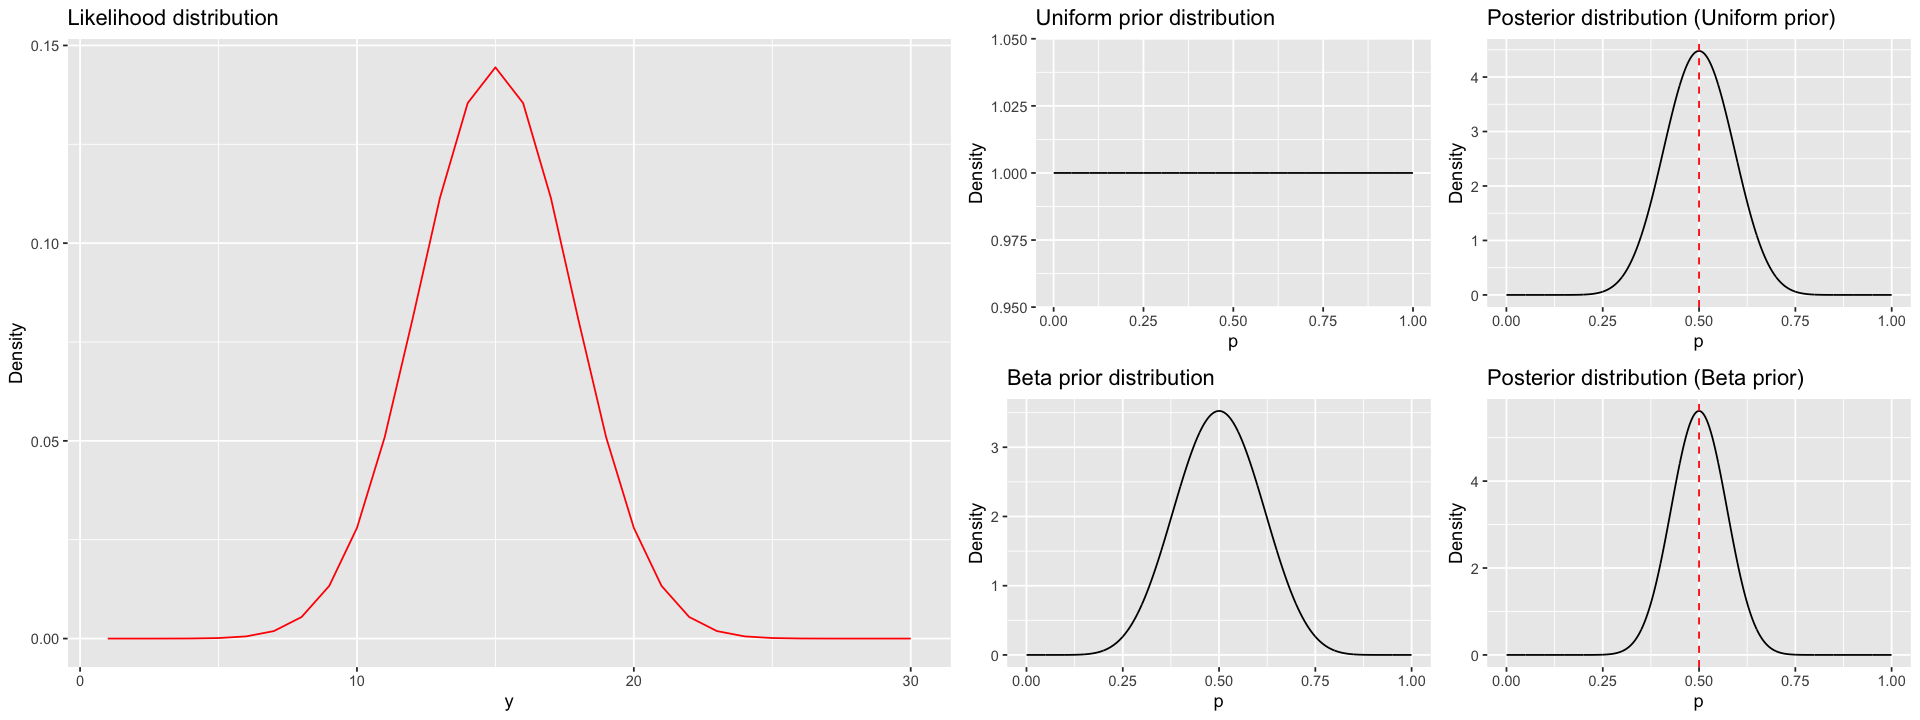

In [308]:
fig1<-ggplot()+
        geom_line(aes(x,p.like),color="red")+
        labs(title="Likelihood distribution",x="y",y="Density")

fig2<-ggplot()+
        geom_line(aes(p,dunif(p)))+
        labs(title="Uniform prior distribution",y="Density")

fig3<-ggplot()+
        geom_line(aes(p,beta.prior))+
        xlim(0,1)+
        labs(title="Beta prior distribution",y="Density")

fig4<-ggplot()+
        geom_line(aes(p,p.post.norm.uniform))+
        geom_vline(xintercept = p.mean.uniform,color="red",linetype="dashed")+
        labs(title="Posterior distribution (Uniform prior)",y="Density")

fig5<-ggplot()+
        geom_line(aes(p,p.post.beta))+
        geom_vline(xintercept = p.mean.beta,color="red",linetype="dashed")+
        xlim(0,1)+
        labs(title="Posterior distribution (Beta prior)",y="Density")
        
options(repr.plot.width=16, repr.plot.height=6)
grid.arrange(fig1,grid.arrange(fig2,fig4,fig3,fig5,nrow=2,ncol=2),nrow=1,ncol=2)

In [309]:
#b) Evaluate the most probable value for the coin probability p and, 
#integrating the posterior probability distribution, give an estimate for a 95% credibility interval.

max.uniform<-p[which.max(p.post.norm.uniform)]
max.beta<-p[which.max(p.post.beta)]

cat("Most probable value for the posterior, given an uniform prior:",max.uniform,"\n")
cat("Most probable value for the posterior, given a beta prior:",max.beta,"\n")

area.uniform<-delta.p*cumsum(p.post.norm.uniform)
area.beta<-delta.p*cumsum(p.post.beta)

cl<-0.95

cl.func<-function(p,cumsum.area,cl){
            for(i in 1:(length(cumsum.area)-1)){
                cl1 <- (1-cl)/2
                cl2 <- cl+(1-cl)/2
                if ((cumsum.area[i+1]>= cl1) & (cumsum.area[i] <= cl1)){
                    x1 <- (p[i]+p[i+1])/2
                }
                if ( (cumsum.area[i+1]>= cl2) & (cumsum.area[i] <= cl2)) {
                    x2 <- (p[i]+p[i+1])/2
                }            
            }
            return(c(x1,x2))
           }

x.uniform<-cl.func(p,area.uniform,cl)
x.beta<-cl.func(p,area.beta,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("Uniform prior:\t","x1 =",x.uniform[1], "\t x2 =",x.uniform[2],"\n")
cat("Beta prior:\t","x1 =",x.beta[1], "\t x2 =",x.beta[2],"\n")

Most probable value for the posterior, given an uniform prior: 0.49975 
Most probable value for the posterior, given a beta prior: 0.49975 

 * Confidance Level = 0.95: 
Uniform prior:	 x1 = 0.3305 	 x2 = 0.669 
Beta prior:	 x1 = 0.363 	 x2 = 0.6365 


Most probable value for the posterior, given an uniform prior: 0.30025 
Most probable value for the posterior, given a beta prior: 0.42875 

 * Confidance Level = 0.95: 
Uniform prior:	 x1 = 0.109 	 x2 = 0.6095 
Beta prior:	 x1 = 0.264 	 x2 = 0.6105 


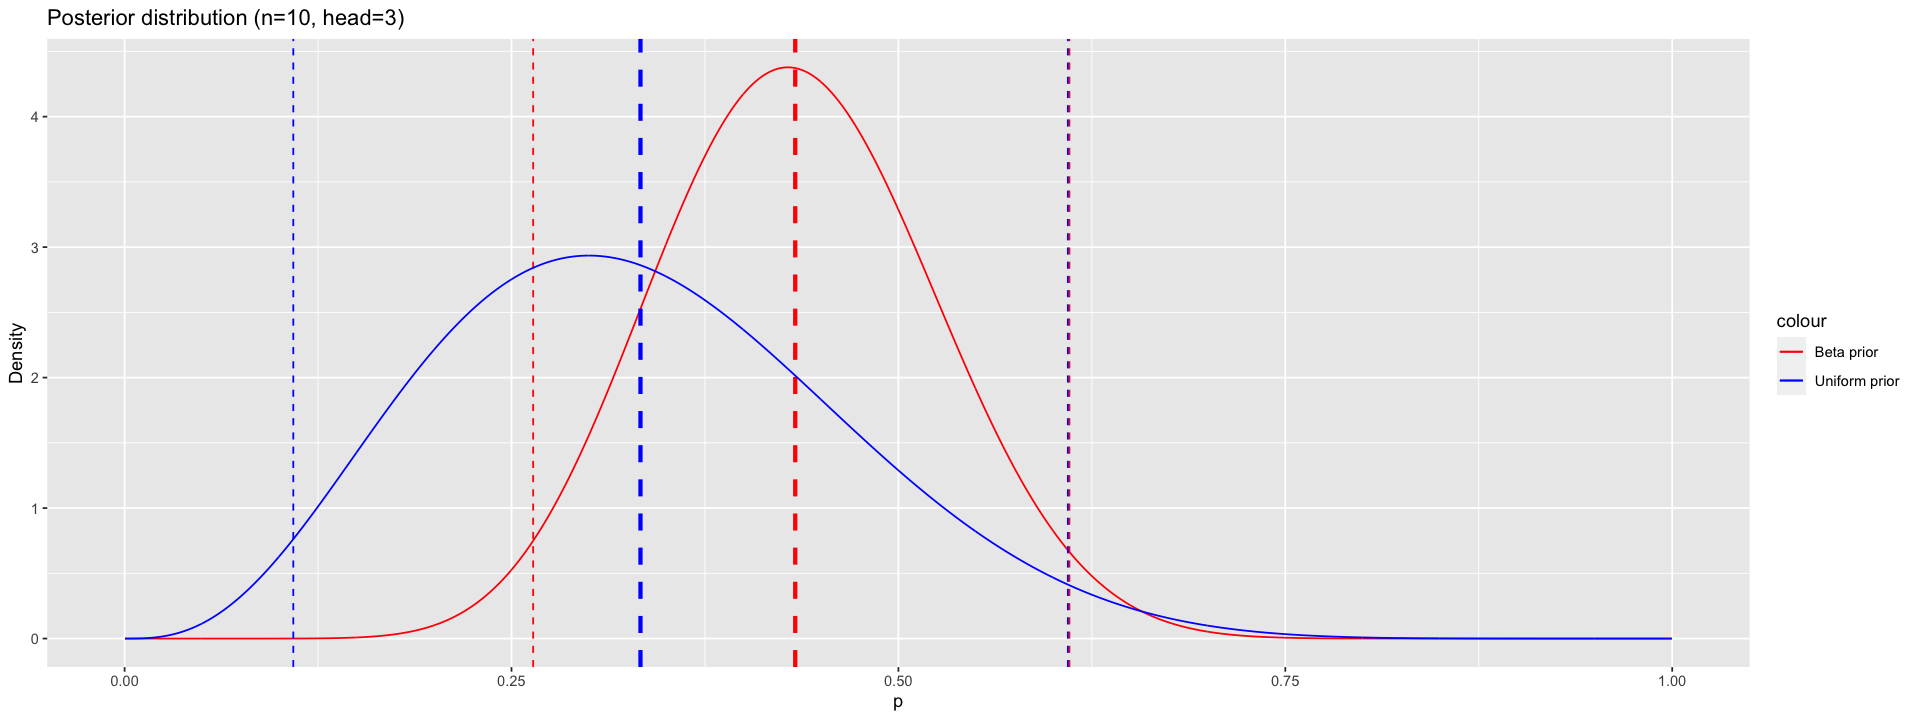

In [310]:
# c) Repeat the same analysis assuming a sequential analysis of the data. 
#    Show how the most probable value and the credibility interval change as a function of the number of coin tosses (i.e. from 1 to 30).

#first esxtraction(1-10)

n1<-10
head1<-3

x1<-seq(1,10,1)

n.sample <- 2000
delta.p <- 1/n.sample
p <- seq(from=1/(2*n.sample), by=1/n.sample, length.out=n.sample)

#Uniform prior
p.star.uniform1 <- dbinom(x=head1, size=n1, prob=p)
p.post.norm.uniform1 <- p.star.uniform1/(delta.p*sum(p.star.uniform1))
p.mean.uniform1 <- delta.p*sum(p*p.post.norm.uniform1)

#Beta prior
alpha<-10
beta<-10

beta.prior1<-dbeta(x=p,alpha,beta)
p.post.beta1<-dbeta(x=p,alpha+head1,beta+(n1-head1))
p.mean.beta1 <- delta.p*sum(p*p.post.beta1)

#Confidance level
max.uniform1<-p[which.max(p.post.norm.uniform1)]
max.beta1<-p[which.max(p.post.beta1)]

cat("Most probable value for the posterior, given an uniform prior:",max.uniform1,"\n")
cat("Most probable value for the posterior, given a beta prior:",max.beta1,"\n")

area.uniform1<-delta.p*cumsum(p.post.norm.uniform1)
area.beta1<-delta.p*cumsum(p.post.beta1)

cl<-0.95

x.uniform1<-cl.func(p,area.uniform1,cl)
x.beta1<-cl.func(p,area.beta1,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("Uniform prior:\t","x1 =",x.uniform1[1], "\t x2 =",x.uniform1[2],"\n")
cat("Beta prior:\t","x1 =",x.beta1[1], "\t x2 =",x.beta1[2],"\n")

#plot
colours<-c("Beta prior"="red","Uniform prior"="blue")

plot1<-ggplot()+
    geom_line(aes(p,p.post.beta1,colour="Beta prior"))+
    geom_vline(xintercept = p.mean.beta1,color="red",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.beta1[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.beta1[2],color="red",linetype="dashed")+
    geom_line(aes(p,p.post.norm.uniform1,colour="Uniform prior"))+
    geom_vline(xintercept = p.mean.uniform1,color="blue",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.uniform1[1],color="blue",linetype="dashed")+
    geom_vline(xintercept = x.uniform1[2],color="blue",linetype="dashed")+
    xlim(0,1)+
    scale_colour_manual(values=colours)+
    labs(title="Posterior distribution (n=10, head=3)",y="Density")
 
 plot1

Most probable value for the posterior, given an uniform prior: 0.40025 
Most probable value for the posterior, given a beta prior: 0.46575 

 * Confidance Level = 0.95: 
Uniform prior:	 x1 = 0.218 	 x2 = 0.6155 
Beta prior:	 x1 = 0.3425 	 x2 = 0.592 


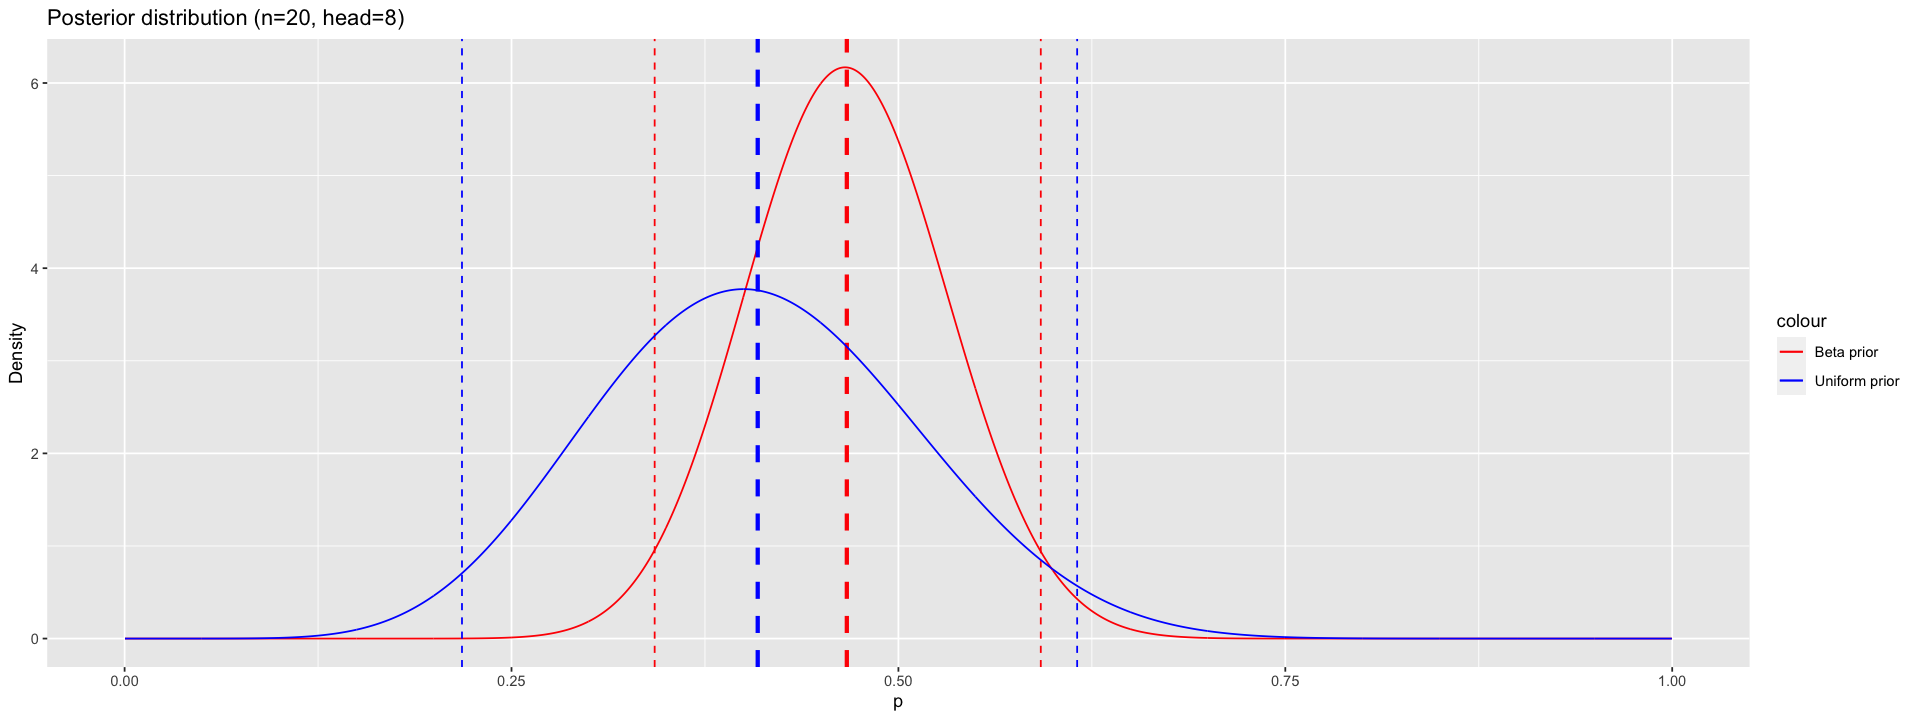

In [311]:
#second esxtraction(1-20)

n2<-20
head2<-8

x2<-seq(1,20,1)

#Uniform prior
p.star.uniform2 <- dbinom(x=head2, size=n2, prob=p)
p.post.norm.uniform2 <- p.star.uniform2/(delta.p*sum(p.star.uniform2))
p.mean.uniform2 <- delta.p*sum(p*p.post.norm.uniform2)

#Beta prior
alpha<-20
beta<-20

beta.prior2<-dbeta(x=p,alpha,beta)
p.post.beta2<-dbeta(x=p,alpha+head2,beta+(n2-head2))
p.mean.beta2 <- delta.p*sum(p*p.post.beta2)

#Confidance level
max.uniform2<-p[which.max(p.post.norm.uniform2)]
max.beta2<-p[which.max(p.post.beta2)]

cat("Most probable value for the posterior, given an uniform prior:",max.uniform2,"\n")
cat("Most probable value for the posterior, given a beta prior:",max.beta2,"\n")

area.uniform2<-delta.p*cumsum(p.post.norm.uniform2)
area.beta2<-delta.p*cumsum(p.post.beta2)

cl<-0.95

x.uniform2<-cl.func(p,area.uniform2,cl)
x.beta2<-cl.func(p,area.beta2,cl)

cat("\n * Confidance Level = 0.95: \n")
cat("Uniform prior:\t","x1 =",x.uniform2[1], "\t x2 =",x.uniform2[2],"\n")
cat("Beta prior:\t","x1 =",x.beta2[1], "\t x2 =",x.beta2[2],"\n")

#plot
colours<-c("Beta prior"="red","Uniform prior"="blue")

plot2<-ggplot()+
    geom_line(aes(p,p.post.beta2,colour="Beta prior"))+
    geom_vline(xintercept = p.mean.beta2,color="red",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.beta2[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.beta2[2],color="red",linetype="dashed")+
    geom_line(aes(p,p.post.norm.uniform2,colour="Uniform prior"))+
    geom_vline(xintercept = p.mean.uniform2,color="blue",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.uniform2[1],color="blue",linetype="dashed")+
    geom_vline(xintercept = x.uniform2[2],color="blue",linetype="dashed")+
    xlim(0,1)+
    scale_colour_manual(values=colours)+
    labs(title="Posterior distribution (n=20, head=8)",y="Density")
 
plot2

Most probable value for the posterior, given an uniform prior: 0.49975 
Most probable value for the posterior, given a beta prior: 0.49975 

 * Confidance Level = 0.95: 
Uniform prior:	 x1 = 0.3305 	 x2 = 0.669 
Beta prior:	 x1 = 0.363 	 x2 = 0.6365 


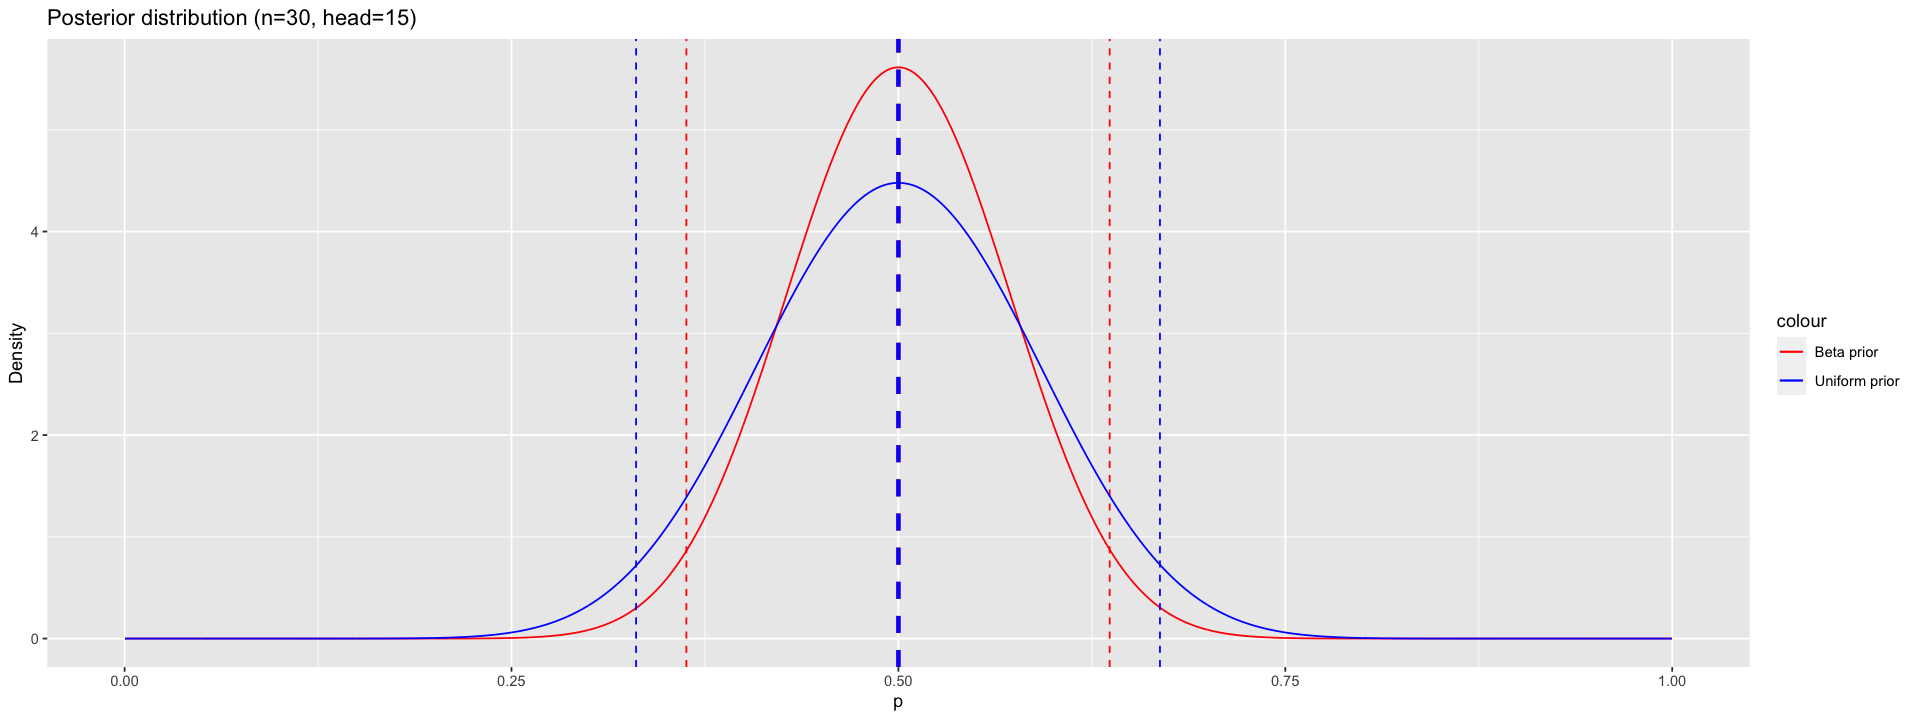

In [312]:
# third extraction(1-30)

cat("Most probable value for the posterior, given an uniform prior:",max.uniform,"\n")
cat("Most probable value for the posterior, given a beta prior:",max.beta,"\n")

cat("\n * Confidance Level = 0.95: \n")
cat("Uniform prior:\t","x1 =",x.uniform[1], "\t x2 =",x.uniform[2],"\n")
cat("Beta prior:\t","x1 =",x.beta[1], "\t x2 =",x.beta[2],"\n")

plot3<-ggplot()+
    geom_line(aes(p,p.post.beta,colour="Beta prior"))+
    geom_vline(xintercept = p.mean.beta,color="red",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.beta[1],color="red",linetype="dashed")+
    geom_vline(xintercept = x.beta[2],color="red",linetype="dashed")+
    geom_line(aes(p,p.post.norm.uniform,colour="Uniform prior"))+
    geom_vline(xintercept = p.mean.uniform,color="blue",linetype="dashed",size=1.2)+
    geom_vline(xintercept = x.uniform[1],color="blue",linetype="dashed")+
    geom_vline(xintercept = x.uniform[2],color="blue",linetype="dashed")+
    xlim(0,1)+
    scale_colour_manual(values=colours)+
    labs(title="Posterior distribution (n=30, head=15)",y="Density")

plot3

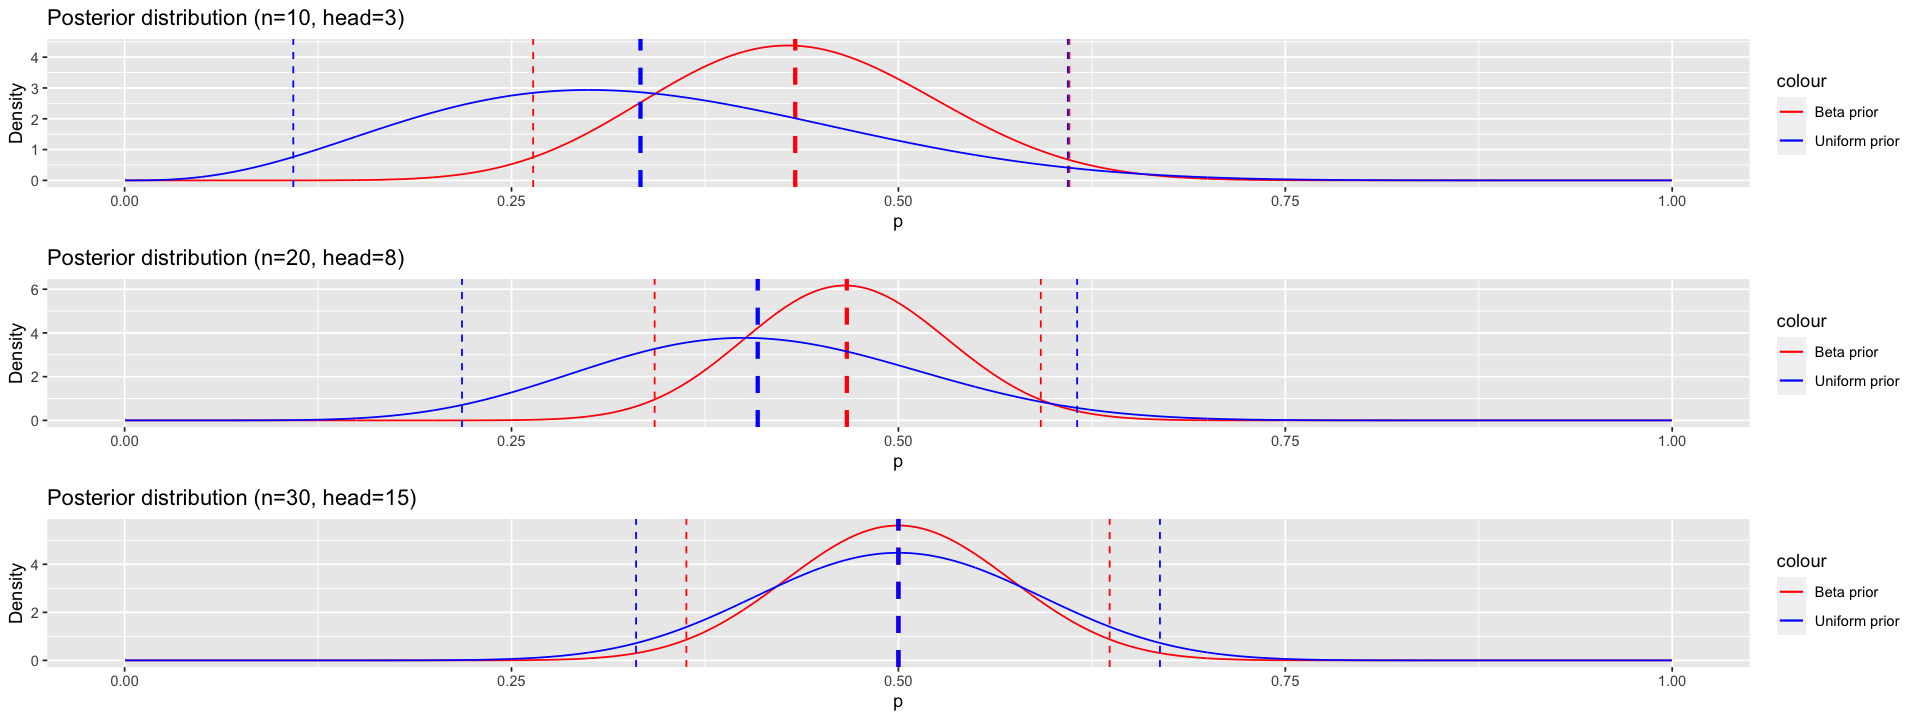

In [313]:
#d) Do you get a different result, by analyzing the data sequentially with respect to a one-step analysis 
#   (i.e. considering all the data as a whole)?

#As we can see from the picture below, the result of the 3-step analysis converges to the one that we get if we consider all the data as a whole

grid.arrange(plot1,plot2,plot3,nrow=3,ncol=1)